In [208]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import SGD
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [169]:
def plot_loss(loss_train, loss_val):
    plt.plot(np.arange(len(loss_train)), loss_train, label='train')
    plt.plot(np.arange(0, len(loss_train), len(loss_train) / N), loss_val, label='validate')
    plt.legend()
    plt.title("losses")
    plt.xlabel("step")
    plt.ylabel("loss")
    plt.show()

In [171]:
def loss(data):
    return -torch.sum(torch.log(data))

In [249]:
def sample_data():
    count = 10000
    rand = np.random.RandomState(0)
    a = 0.3 + 0.1 * rand.randn(count)
    b = 0.8 + 0.05 * rand.randn(count)
    mask = rand.rand(count) < 0.5
    samples = np.clip(a * mask + b * (1 - mask), 0.0, 1.0)
    return np.digitize(samples, np.linspace(0.0, 1.0, 100))

In [250]:
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.thetas = torch.zeros(100, requires_grad=True)

    def forward(self, x):
        return torch.exp(self.thetas[x]) / torch.sum(torch.exp(self.thetas))
    
    def parameters(self):
        return [self.thetas]
    
    def __call__(self, x):
        return self.forward(x)

In [251]:
samples = sample_data()
X_train, X_test = train_test_split(samples, test_size=0.2, random_state=42)
X_train, X_val = train_test_split(X_train, test_size=0.125, random_state=42)
ltr, lte, lva = 7000, 2000, 1000

In [195]:
N = 50
Nb = 1000
model = MyModel()

In [196]:
def train():
    optimizer = SGD(model.parameters(), lr=1e-3)
    train_loader = DataLoader(X_train, batch_size=Nb, shuffle=True)
    loss_train, loss_val = [], []
    
    for epoch in range(N):
        for batch in train_loader:
            optimizer.zero_grad()
            output = model(batch)
            loss_ = loss(output)
            loss_train.append(loss_ / Nb)
            loss_.backward()
            optimizer.step()

        with torch.no_grad():
            loss_val.append(loss(model(X_val)) / lva)

    with torch.no_grad():
        print("Test loss: " + str(float(loss(model(X_test)) / lte)))

    return loss_train, loss_val

In [197]:
loss_train, loss_val = train()

Test loss: 4.0913872718811035


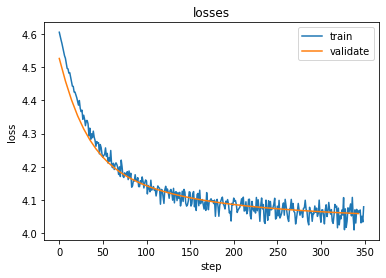

In [198]:
plot_loss(loss_train, loss_val)

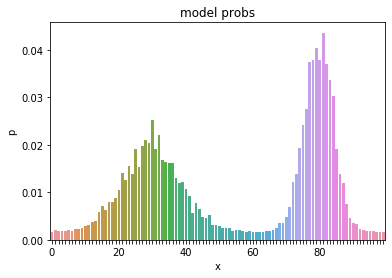

In [209]:
x = np.arange(100)
probs = model(x)
plot_ = sns.barplot(x, probs.detach().numpy())
for ind, label in enumerate(plot_.get_xticklabels()):
    if ind % 20 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)

plt.title("model probs")
plt.xlabel("x")
plt.ylabel("p")
plt.show()

In [269]:
def hist(x, y, title):
    #sns.distplot(y, bins=x, kde=False)
    plt.hist(y, bins=x, density=True)
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("p")
    plt.show()

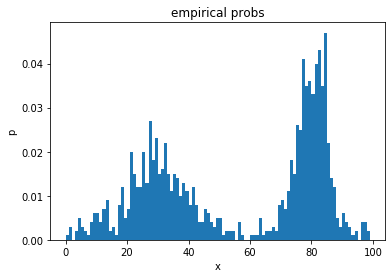

In [270]:
x = np.arange(100)
y = np.random.choice(x, size=1000, p=probs.detach().numpy())
hist(x, y, "empirical probs")

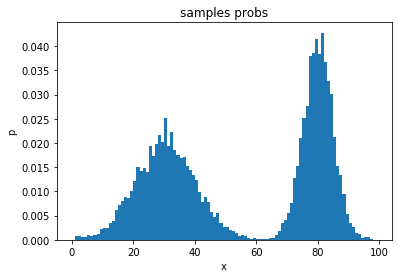

In [271]:
hist(np.arange(100), samples, "samples probs")

In [276]:
def hist2(x1, y1, x2, y2):
    plt.hist(y1, bins=x1, density=True, label='emperical', color='red', alpha=0.3)
    plt.hist(y2, bins=x2, density=True, label='samples', color='blue', alpha=0.3)
    plt.legend()
    plt.title("both")
    plt.xlabel("x")
    plt.ylabel("p")
    plt.show()

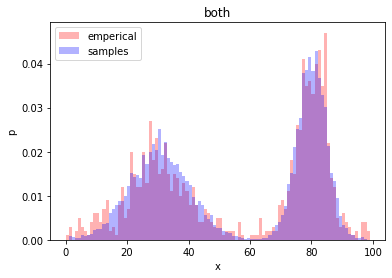

In [277]:
hist2(x, y, x, samples)